In [10]:
from tensorflow import keras 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 13s 0us/step


In [11]:
x_train.shape

(50000, 32, 32, 3)

In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

50000 train samples
10000 test samples


In [14]:
#print(x_test[0,:,:,0].shape)
#plt.imshow(x_test[2000,100:,:])#for 1 channel in matplotlib we put 0 in place of channel
#plt.show()

In [15]:
num_classes=10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [16]:
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import AveragePooling2D

In [17]:
model=tf.keras.models.Sequential([
    
    tf.keras.Input(shape=(32,32,3)),
    
    tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=5,
    strides=(1, 1),
    padding="valid",
    # bias_initializer='ones',
    # kernel_initializer='ones'
    ),#"same" means zero padding, 'valid' means 1 padding,

    tf.keras.layers.BatchNormalization(),#This layer should be inserted between the convolutional layer and the activation function
#mean of 0 and a standard deviation of 1 
   
    #tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"),

    tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=5,
    strides=(1, 1),
    padding="valid"),
    
    #tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,#height and weight is less then 5 so cant use size 5
    strides=(1, 1),
    padding="valid"),
    #tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"),

    tf.keras.layers.LeakyReLU(alpha=0.1),
    #tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=2, padding="valid"),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128),
    
    #tf.keras.layers.ReLU(),

   tf.keras.layers.LeakyReLU(alpha=0.1),# the slope of the activation function will be 0.1 for x < 0.

    tf.keras.layers.Dense(10,activation='softmax'),
   # tf.keras.layers.Dropout(0.2)
    
    
     #sigmoid for binary
    #softmax multiclass

])

In [18]:
model.build()

In [19]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [21]:
model.layers[0].get_weights()[0]

array([[[[-0.03021962,  0.06935292,  0.04544494, ..., -0.00589339,
          -0.01489634, -0.03908185],
         [-0.08186321,  0.06940733, -0.07038127, ...,  0.04490633,
          -0.020958  , -0.05960483],
         [-0.06544659, -0.05096524,  0.03900525, ..., -0.05102161,
           0.0231371 ,  0.05512559]],

        [[-0.02493943, -0.08046474, -0.02710227, ...,  0.02253362,
          -0.00032838,  0.06271085],
         [ 0.07316962,  0.00020538, -0.04514599, ..., -0.06607747,
           0.07716404,  0.03423127],
         [-0.00562377, -0.04461412, -0.01275449, ...,  0.01061106,
           0.06541075,  0.00158615]],

        [[ 0.03288523, -0.05483547, -0.03559108, ..., -0.02490216,
           0.06785184, -0.06383839],
         [ 0.06204337, -0.03470293,  0.02603957, ...,  0.00072267,
          -0.00487078,  0.01337408],
         [-0.07081109, -0.03152684,  0.06791662, ...,  0.01028717,
           0.05857173,  0.03403024]],

        [[-0.06303376, -0.00650184,  0.0156552 , ...,  0.0

In [22]:
model.layers[0].get_weights()[0].max(),model.layers[0].get_weights()[0].min()

(0.08280195, -0.08263348)

In [23]:
model.fit(x_train,y_train,epochs=3,batch_size=24,validation_data=(x_test,y_test))

Epoch 1/3
2084/2084 [==============================] - 17s 5ms/step - loss: 1.5003 - accuracy: 0.4648 - val_loss: 1.4944 - val_accuracy: 0.4949
Epoch 2/3
2084/2084 [==============================] - 9s 4ms/step - loss: 1.1467 - accuracy: 0.5990 - val_loss: 1.2285 - val_accuracy: 0.5803
Epoch 3/3
2084/2084 [==============================] - 9s 4ms/step - loss: 0.9959 - accuracy: 0.6545 - val_loss: 1.1258 - val_accuracy: 0.6176


In [24]:
model.layers[0].get_weights()[0].max(),model.layers[0].get_weights()[0].min()

(0.33261347, -0.2630642)

In [25]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 10))

In [26]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1258 - accuracy: 0.6176


[1.1257920265197754, 0.6176000237464905]

In [27]:
pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [28]:
y_score=model.predict(x_test)
print(y_score.shape)
y_pred=np.argmax(y_score,axis=1)#return col which has max value
y_test=np.argmax(y_test,axis=1)#axis 0=rows and axis 1=col


313/313 [==============================] - 1s 2ms/step
(10000, 10)


In [29]:
y_test.shape

(10000,)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.67      0.85      0.75      1000
           2       0.65      0.40      0.49      1000
           3       0.45      0.43      0.44      1000
           4       0.57      0.54      0.56      1000
           5       0.69      0.35      0.46      1000
           6       0.45      0.92      0.60      1000
           7       0.77      0.66      0.71      1000
           8       0.68      0.77      0.72      1000
           9       0.83      0.57      0.68      1000

    accuracy                           0.62     10000
   macro avg       0.65      0.62      0.61     10000
weighted avg       0.65      0.62      0.61     10000



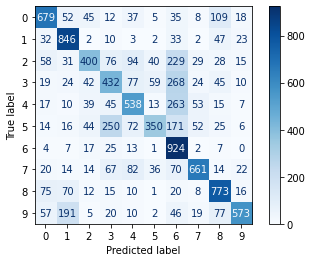

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                               )
disp.plot(cmap='Blues')
plt.show()